<a href="https://colab.research.google.com/github/SergeyB81/Portfolio-DS/blob/main/%D0%A2%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D0%BE%D0%B5%20CG/Bank-62-68/bank_ds_trainee_test_case_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Задание №4**. Предположим, что мы построили рекомендательную систему, и ожидаем, что средний чек клиента вследствие этого должен вырасти. Мы провели AB-тест и собрали данные по контрольной и тестовой группе. Предложите и проведите статистический тест, который можно применить к этим данным.

В процессе выполнения задания разрешено пользоваться библиотеками scipy и statsmodels.

In [131]:
import pandas as pd
import numpy as np

In [132]:
control = np.random.lognormal(mean=5, sigma=2, size=(100000,))
test = np.random.lognormal(mean=5.04, sigma=2, size=(100000,))

In [133]:
control

array([313.25340377, 154.65677435, 616.91180689, ..., 327.67855196,
        63.76131444,  96.0512738 ])

In [134]:
pd.Series(control)

,0
0,313.253404
1,154.656774
2,616.911807
3,50.039166
4,84.644172
...,...
99995,457.316804
99996,12.098739
99997,327.678552
99998,63.761314


<Axes: >

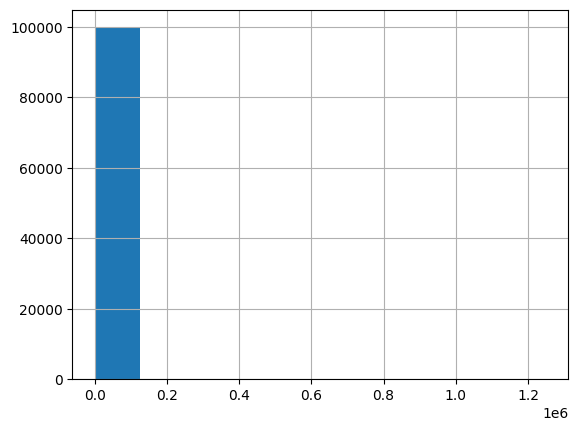

In [135]:
pd.Series(control).hist()

<Axes: >

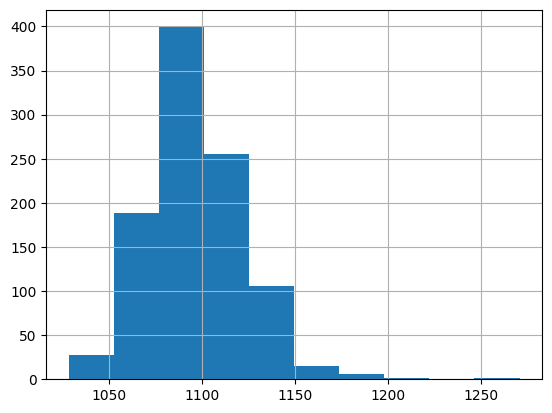

In [136]:
pd.Series([np.random.lognormal(mean=5, sigma=2, size=100000).mean() for _ in range(1000)]).hist()

In [137]:
np.mean([np.random.lognormal(mean=5, sigma=2, size=100000).mean() for _ in range(1000)])

np.float64(1096.6880234361422)

In [138]:
np.mean([np.random.lognormal(mean=5.04, sigma=2, size=100000).mean() for _ in range(1000)])

np.float64(1141.3222670472753)

In [139]:
from scipy.stats import ttest_ind

In [140]:
ttest_ind(control, test, equal_var=False)

TtestResult(statistic=np.float64(-2.0268081121346024), pvalue=np.float64(0.042683364526162094), df=np.float64(199997.30126812827))

In [141]:
from tqdm.notebook import tqdm

In [142]:
n = 1000
result = []
for _ in tqdm(range(n)):
  control = np.random.lognormal(mean=5, sigma=2, size=(100000,))
  test = np.random.lognormal(mean=5.04, sigma=2, size=(100000,))
  _, pval = ttest_ind(control, test, equal_var=False)
  result.append(pval)


  0%|          | 0/1000 [00:00<?, ?it/s]

In [143]:
t = pd.Series(result)

<Axes: >

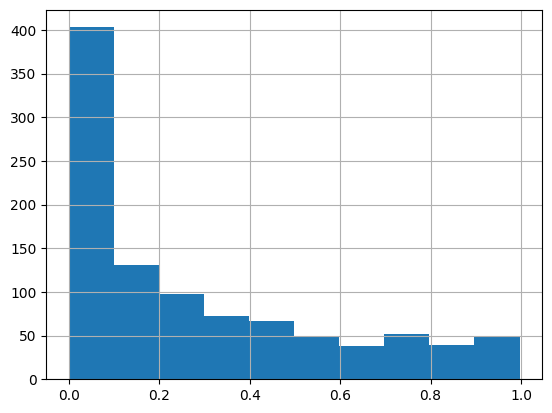

In [144]:
t.hist()

In [145]:
(t < 0.05).mean()

np.float64(0.292)

**то есть t тест дедектит только 30%, когда средние действительно разные. Так как взяты из разных распределений. Это говорит о том что данные распределены ненормально и мы не можем его использовать.**


In [146]:
import seaborn as sns

<Axes: ylabel='Proportion'>

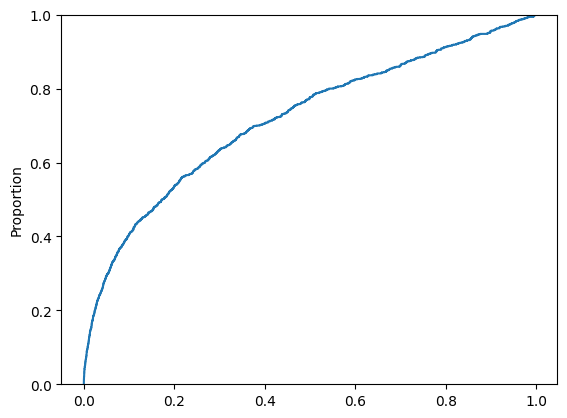

In [147]:
sns.ecdfplot(t)

In [148]:
n = 1000
result = []
for _ in tqdm(range(n)):
  control = np.random.pareto(0.5, size=10000)
  test = np.random.pareto(0.5, size=10000)
  _, pval = ttest_ind(control,test,equal_var=False)
  result.append(pval)

  0%|          | 0/1000 [00:00<?, ?it/s]

<Axes: >

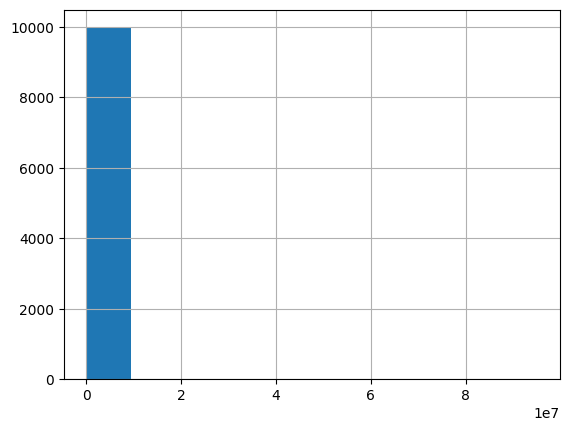

In [149]:
pd.Series(control).hist()

In [150]:
t = pd.Series(result)

<Axes: >

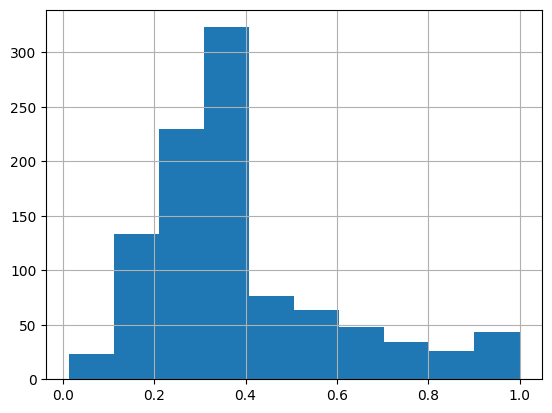

In [151]:
t.hist()

<Axes: ylabel='Proportion'>

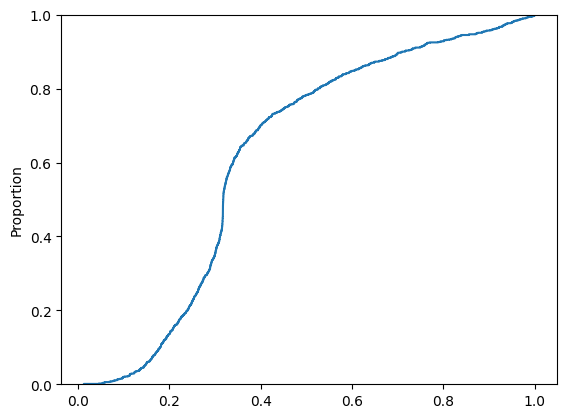

In [152]:
sns.ecdfplot(t)

In [153]:
(t < 0.05).mean()

np.float64(0.002)

## **Манн-Уитни**

In [155]:
from scipy.stats import mannwhitneyu

In [156]:
mannwhitneyu(control,test)

MannwhitneyuResult(statistic=np.float64(50347790.0), pvalue=np.float64(0.39427763654277503))

In [157]:
n = 1000
result = []
for _ in tqdm(range(n)):
  control = np.random.lognormal(mean=5, sigma=2, size=100000)
  test = np.random.lognormal(mean=5.04, sigma=2, size=100000)
  _, pval = mannwhitneyu(control,test)
  result.append(pval)

t = pd.Series(result)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [158]:
(t < 0.05).mean()

np.float64(0.988)

In [159]:
n = 100
result = []
for _ in tqdm(range(n)):
  control = np.random.lognormal(mean=5, sigma=2, size=100000)
  test = np.random.lognormal(mean=5.04, sigma=2, size=100000)
  _, pval = mannwhitneyu(control,test)
  result.append(pval)

t = pd.Series(result)

  0%|          | 0/100 [00:00<?, ?it/s]

In [160]:
(t < 0.05).mean()

np.float64(1.0)